In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bond_price(F,C,n,y):
    t = np.arange(1,n+1)
    price = np.sum(C/(1+y)**t) + F/(1+y)**n 
    return price

F = 100 #face value
C = 5 #coupon
n = 10 #maturity
y = 0.03 #yield

In [3]:
samples = np.linspace(-0.02,0.02,50) #Creating values of delta_y in order to compute bond prices for a yield between y-2% and y+2%

bond_prices = []

for delta in samples:
    new_y = y + delta
    res = bond_price(F,C,n,new_y)
    bond_prices.append(res)

In [4]:
def macauley_duration(f,c,N,Y):
    t = np.arange(1,n+1)
    discounted_coupons = c/(1+Y)**t 
    discounted_face = F/(1+Y)**N
    P = bond_price(f,c,N,Y)
    D = (np.sum(t*discounted_coupons) + n*discounted_face)/P 
    return D

durations = []
for delta in samples:
    new_y = y + delta 
    res = macauley_duration(F,C,n,new_y)
    durations.append(res)

In [5]:
def bond_convexity(f, c, N, Y):
    t = np.arange(1, n+1)
    discounted_coupons = c * t * (t+1) / (1+Y)**(t+2)
    discounted_face = f * N * (N+1) / (1+Y)**(N+2)
    P = bond_price(F,C,n,y)
    Cvx = (np.sum(discounted_coupons) + discounted_face) / P
    return Cvx

convexity = []
for delta in samples:
    new_y = y + delta
    res = bond_convexity(F,C,n,new_y)
    convexity.append(res)

In [6]:
deltaP_real = []
for delta in samples:
    new_y = y + delta
    res = (bond_price(F,C,n, new_y) - bond_price(F,C,n,y))/bond_price(F,C,n,y)
    deltaP_real.append(res)

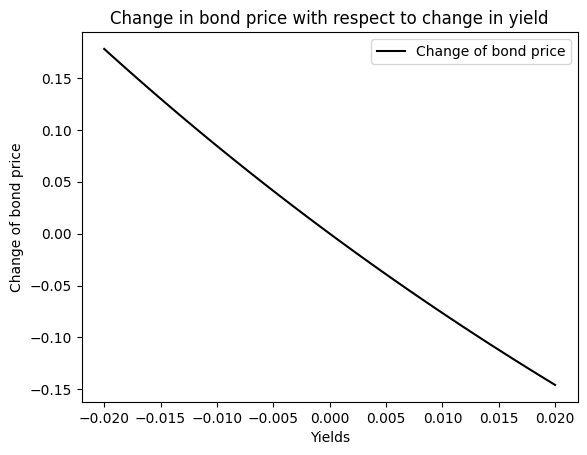

In [7]:
plt.figure()
plt.plot(samples,deltaP_real, color='black', label='Change of bond price')
plt.xlabel('Yields')
plt.ylabel('Change of bond price')
plt.title('Change in bond price with respect to change in yield')
plt.legend()

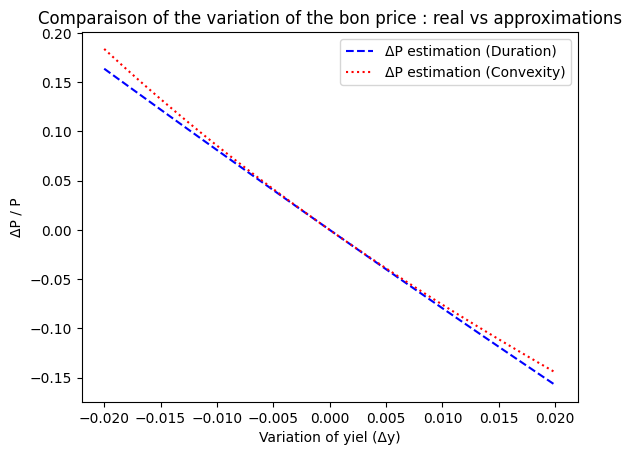

In [11]:
# Initial bond price
P0 = bond_price(F, C, n, y)

deltaP_duration = []
deltaP_convexity = []
for i, delta in enumerate(samples):
    D_mac = durations[i]
    Cvx = convexity[i]
    D_mod = D_mac / (1 + y)
    
    # Approximation avec la Duration
    deltaP_D = -D_mod * delta
    
    # Approximation avec la Convexité
    deltaP_C = -D_mod * delta + 0.5 * Cvx * (delta ** 2)
    
    deltaP_duration.append(deltaP_D)
    deltaP_convexity.append(deltaP_C)

plt.plot(samples, deltaP_duration, color='blue', linestyle='--', label='ΔP estimation (Duration)')
plt.plot(samples, deltaP_convexity, color='red', linestyle=':', label='ΔP estimation (Convexity)')
plt.xlabel('Variation of yiel (Δy)')
plt.ylabel('ΔP / P')
plt.title('Comparaison of the variation of the bon price : real vs approximations')
plt.legend()
plt.show()